<a href="https://colab.research.google.com/github/Kimani-kj/k13-review/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel("./cleaned_k13_2_latest.xlsx")


In [ ]:
df.shape[0]

665

In [ ]:
df.head()

In [ ]:
# prompt: create a pivot table with pmid year_pub and other_k13_mutation and country

pivot_table = pd.pivot_table(df, values='pmid', index=['year_pub', 'other_k13_mutations'],
                             columns=['country'], aggfunc='count', fill_value=0)
pivot_table


country                                                      BURUNDI  DRC  \
year_pub other_k13_mutations                                                
2014     K189T,K189N,F334L,L368L,F439F,I465T,Q467Q,S522S...        0    0   
2015     -                                                         0    0   
         A578S                                                     0    0   
         M442V, N554S, A569S, A578S, C439C, S477S, Y500Y...        0    0   
         N531I                                                     0    0   
...                                                              ...  ...   
2024     T535A, A504T, Y630F, N599I, S550F                         0    0   
         T535T                                                     0    0   
         V637V,C469C,A578S                                         0    0   
         V637V,E643E,A578S,A582V                                   0    0   
         Y546H,A578S                                               0    0   

country                                                      ERITREA  \
year_pub other_k13_mutations                                           
2014     K189T,K189N,F334L,L368L,F439F,I465T,Q467Q,S522S...        0   
2015     -                                                         0   
         A578S                                                     0   
         M442V, N554S, A569S, A578S, C439C, S477S, Y500Y...        0   
         N531I                                                     0   
...                                                              ...   
2024     T535A, A504T, Y630F, N599I, S550F                         0   
         T535T                                                     0   
         V637V,C469C,A578S                                         0   
         V637V,E643E,A578S,A582V                                   0   
         Y546H,A578S                                               0   

country                                                      ETHIOPIA  KENYA  \
year_pub other_k13_mutations                                                   
2014     K189T,K189N,F334L,L368L,F439F,I465T,Q467Q,S522S...         0      0   
2015     -                                                          5      1   
         A578S                                                      0      0   
         M442V, N554S, A569S, A578S, C439C, S477S, Y500Y...         0      1   
         N531I                                                      1      0   
...                                                               ...    ...   
2024     T535A, A504T, Y630F, N599I, S550F                          1      0   
         T535T                                                      0      1   
         V637V,C469C,A578S                                          0      1   
         V637V,E643E,A578S,A582V                                    0      1   
         Y546H,A578S                                                0      0   

country                                                      MOZAMBIQUE  \
year_pub other_k13_mutations                                              
2014     K189T,K189N,F334L,L368L,F439F,I465T,Q467Q,S522S...           0   
2015     -                                                            0   
         A578S                                                        0   
         M442V, N554S, A569S, A578S, C439C, S477S, Y500Y...           0   
         N531I                                                        0   
...                                                                 ...   
2024     T535A, A504T, Y630F, N599I, S550F                            0   
         T535T                                                        0   
         V637V,C469C,A578S                                            0   
         V637V,E643E,A578S,A582V                                      0   
         Y546H,A578S                                                  0   

country                                     

In [ ]:
# prompt: Using dataframe pivot_table: most frequent mutation across years and coutry

# Find the column with the highest sum across all rows
# This represents the most frequent mutation across all years and countries

import pandas as pd

# Calculate the sum of each column
column_sums = pivot_table.sum()

# Find the column with the maximum sum
most_frequent_mutation = column_sums.idxmax()

# Print the result
print(f"The most frequent mutation across years and countries is: {most_frequent_mutation}")


The most frequent mutation across years and countries is: UGANDA


In [ ]:
# prompt: from the df subset it to leave other_k13_mutations, year pmid and country

# Assuming df is already defined as in your provided code

subset_df = df[['other_k13_mutations', 'year_pub', 'pmid', 'country']]
print(subset_df.head())


   other_k13_mutations  year_pub       pmid country
0                    -      2021   34551228  UGANDA
1                    -      2021   34551228  UGANDA
2  A578S, Q613E, S522C      2022   35703955     DRC
3                    -      2022   36036611   KENYA
4                A578S      2024   39136468  UGANDA


In [ ]:
# prompt: from subset_df filter out from the other_k13_mutations column the empty and '-' characters

# Filter out empty and '-' characters from 'other_k13_mutations' column
subset_df = subset_df[~subset_df['other_k13_mutations'].isin(['', '-'])]
print(subset_df.head())
subset_df.shape[0]

     other_k13_mutations  year_pub       pmid     country
2    A578S, Q613E, S522C      2022   35703955         DRC
4                  A578S      2024   39136468      UGANDA
6   TGC469TGT, GGC548GGT      2021   34641867  MOZAMBIQUE
12                 E433D      2022   36451216    ETHIOPIA
15          R255K, L258M      2024   39159629    TANZANIA


212

In [ ]:
# prompt: suggest plots

# Assuming df and subset_df are already defined as in your provided code

# 1. Trend of publications over time for the most frequent mutation:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_pub', data=subset_df[subset_df['other_k13_mutations'] == most_frequent_mutation])
plt.title(f'Publications Trend for {most_frequent_mutation} Mutation')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
plt.show()

# 2. Distribution of mutations across different countries:
plt.figure(figsize=(15, 6))
sns.countplot(x='country', data=subset_df, order=subset_df['country'].value_counts().index) # Order bars by frequency
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Mutations Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Mutations')
plt.show()


# 3. Heatmap of mutations across years and countries:
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of K13 Mutations Across Years and Countries')
plt.xlabel('Country')
plt.ylabel('Year of Publication / Mutation')
plt.show()

# 4. Top N most frequent mutations:
top_n = 10 # Change this to display a different number of top mutations
top_mutations = subset_df['other_k13_mutations'].value_counts().nlargest(top_n)
plt.figure(figsize=(12, 6))
top_mutations.plot(kind='bar')
plt.title(f'Top {top_n} Most Frequent K13 Mutations')
plt.xlabel('Mutation')
plt.ylabel('Number of Occurrences')
plt.show()


NameError: name 'most_frequent_mutation' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# prompt: the subset df some rows have multiple mutation in a list whic is comma separated, i want you to make each in a list link it to the pmid as a new row

import pandas as pd

# Assuming df and subset_df are already defined as in your provided code
# ... (your existing code)

# Explode the 'other_k13_mutations' column
new_rows = []
for index, row in subset_df.iterrows():
    mutations = row['other_k13_mutations']
    # Convert mutations to string if it's not already to handle potential float values
    if not isinstance(mutations, str):
        mutations = str(mutations)
    if ',' in mutations:  # Check if there are multiple mutations
      for mutation in mutations.split(','):
          new_row = row.copy()
          new_row['other_k13_mutations'] = mutation.strip() # strip whitespace
          new_rows.append(new_row)
    else:
      new_rows.append(row)


exploded_df = pd.DataFrame(new_rows)
print(exploded_df.head())

  other_k13_mutations  year_pub       pmid     country
2               A578S      2022   35703955         DRC
2               Q613E      2022   35703955         DRC
2               S522C      2022   35703955         DRC
4               A578S      2024   39136468      UGANDA
6           TGC469TGT      2021   34641867  MOZAMBIQUE


In [ ]:
exploded_df.head()

,other_k13_mutations,year_pub,pmid,country
2,A578S,2022,35703955,DRC
2,Q613E,2022,35703955,DRC
2,S522C,2022,35703955,DRC
4,A578S,2024,39136468,UGANDA
6,TGC469TGT,2021,34641867,MOZAMBIQUE


In [ ]:
# prompt: Using dataframe exploded_df: save this df as a .xlsx

# Import the pandas library
import pandas as pd

# Save the dataframe to an excel file
exploded_df.to_excel("exploded_df.xlsx", index=False) # Set index=False to avoid saving the index


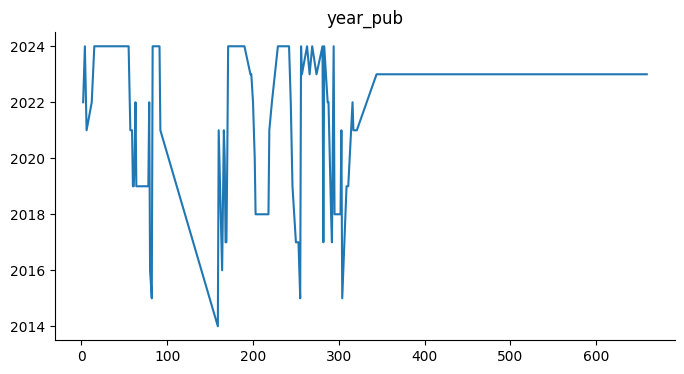

In [ ]:
# @title year_pub

from matplotlib import pyplot as plt
exploded_df['year_pub'].plot(kind='line', figsize=(8, 4), title='year_pub')
plt.gca().spines[['top', 'right']].set_visible(False)

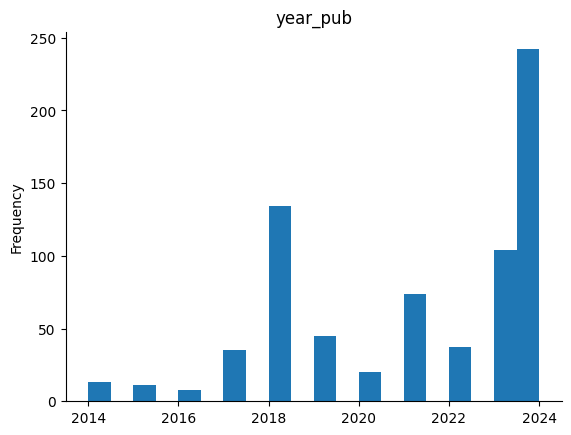

In [ ]:
# @title year_pub

from matplotlib import pyplot as plt
exploded_df['year_pub'].plot(kind='hist', bins=20, title='year_pub')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: from exploded_df . group each country and show the reported mutations and the year they were reported and from which papers

# Group by country and show reported mutations, year, and papers
# Group by country and show reported mutations, year, and papers
grouped_df = exploded_df.groupby('country').agg(
    reported_mutations=('other_k13_mutations', lambda x: ', '.join(map(str, x.unique()))), # Convert values to string here
    years_reported=('year_pub', lambda x: ', '.join(map(str, x.unique()))),
    papers=('pmid', lambda x: ', '.join(map(str, x.unique())))
).reset_index()

grouped_df

,country,reported_mutations,years_reported,papers
0,DRC,"A578S, Q613E, S522C, P417P, R471R, S477S, T478...","2022, 2021, 2024, 2017, 2018","35703955, 34152946, 38746440, 34491220, 28420..."
1,ETHIOPIA,"E433D, A582V, K189T, T535A, A504T, Y630F, N599...","2022, 2024, 2021, 2023, 2015","36451216, 38287365, 33663492, 39083679, 376409..."
2,KENYA,"P417P, V454V, C469C, R471R, A504A, G533G, S522...","2021, 2020, 2022, 2016, 2015, 2024, 2023, 2018...","34152946, 32795367, 35266823, 26801909, 256952..."
3,MOZAMBIQUE,"TGC469TGT, GGC548GGT",2021,34641867
4,RWANDA,"441L, 449A, 469F, 568G, C469F, G533A, V555A, A...","2024, 2021, 2016, 2022, 2023","38746440, 33350925, 27573632, 34216470, 381965..."
5,SOMALIA,nan,2021,10.1101/2021.01.27.428390
6,SUDAN,"A621V, F375S, K378R, D389N, K430K, E433D, P443...","2019, 2020","31034031, 32070355"
7,TANZANIA,"R255K, L258M, nan, K189T, A175T, A578S, N133K,...","2024, 2021, 2019, 2020","39159629, 34152946, 30898164, 38746440, 342704..."
8,UGANDA,"A578S, A569S, F491S, K610E, P615N, V555A, N594...","2024, 2019, 2022, 2014, 2021, 2018, 2017, 2016...","39136468, 38712186, 31358588, 35511795, 387464..."


In [ ]:
# prompt: Using dataframe grouped_df: save it and download

# Import necessary libraries
import pandas as pd
from io import StringIO

# Create a temporary CSV file to store the dataframe
csv_buffer = StringIO()
grouped_df.to_csv(csv_buffer, index=False)

# Download the CSV file
from IPython.display import HTML
import base64
csv_buffer.seek(0)
b64 = base64.b64encode(csv_buffer.getvalue().encode()).decode()
href = f'<a href="data:file/csv;base64,{b64}" download="grouped_df.csv">Download grouped_df.csv</a>'
display(HTML(href))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful